In [2]:
##Escenarios suelo de conservación

rm(list=ls())

# Librerías ====
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse,lubridate, showtext,srvyr,foreign)
font_add_google("Poppins", "pop")
showtext_auto()
remotes::install_github("cpyp-ipdp/funcionespgd", force = TRUE)
library(funcionespgd)

Cargando paquete requerido: pacman

Using GitHub PAT from the git credential store.




rlang    (1.1.4 -> 1.1.6) [CRAN]
glue     (1.7.0 -> 1.8.0) [CRAN]
cli      (3.6.3 -> 3.6.5) [CRAN]
magrittr (2.0.3 -> 2.0.4) [CRAN]
tibble   (3.2.1 -> 3.3.0) [CRAN]
ggplot2  (3.5.2 -> 4.0.0) [CRAN]


Installing 6 packages: rlang, glue, cli, magrittr, tibble, ggplot2

Warning message:
"packages 'tibble', 'ggplot2' are in use and will not be installed"
Installing packages into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\rlang\libs\x64\rlang.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\glue\libs\x64\glue.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\glue\libs\x64\glue.dll: Permission denied"
Warning message:
"restored 'glue'"


package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\cli\libs\x64\cli.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"


package 'magrittr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'magrittr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\magrittr\libs\x64\magrittr.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\magrittr\libs\x64\magrittr.dll: Permission denied"
Warning message:
"restored 'magrittr'"



The downloaded binary packages are in
	C:\Users\claud\AppData\Local\Temp\RtmpUNxVwa\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\claud\AppData\Local\Temp\RtmpUNxVwa\remotes93e4334751ff\cpyp-ipdp-funcionespgd-6fd64b9/DESCRIPTION' ... OK
* preparing 'funcionespgd':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted 'LazyData' from DESCRIPTION
* building 'funcionespgd_0.1.0.tar.gz'



Installing package into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



In [15]:
conectividad <- openxlsx::read.xlsx("datos_suelo.xlsx", sheet="conectividad")%>%
  
rename(
  year = periodo

)%>%
select(year,conectividad)%>%
intervals("conectividad", margen = 0.003, año_base = 2019)%>%
#Sustituir intervalo inferior por 35 (inercial)
mutate(inferior=35)


conectividad

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2019,35.00000,35.00000,35
2,2020,35.00000,35.10500,35
3,2021,35.00000,35.21031,35
4,2022,35.00000,35.31595,35
5,2023,35.00000,35.42189,35
6,2024,35.00000,35.52816,35
7,2025,35.00000,35.63474,35
8,2026,35.00000,35.74165,35
9,2027,35.00000,35.84887,35


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


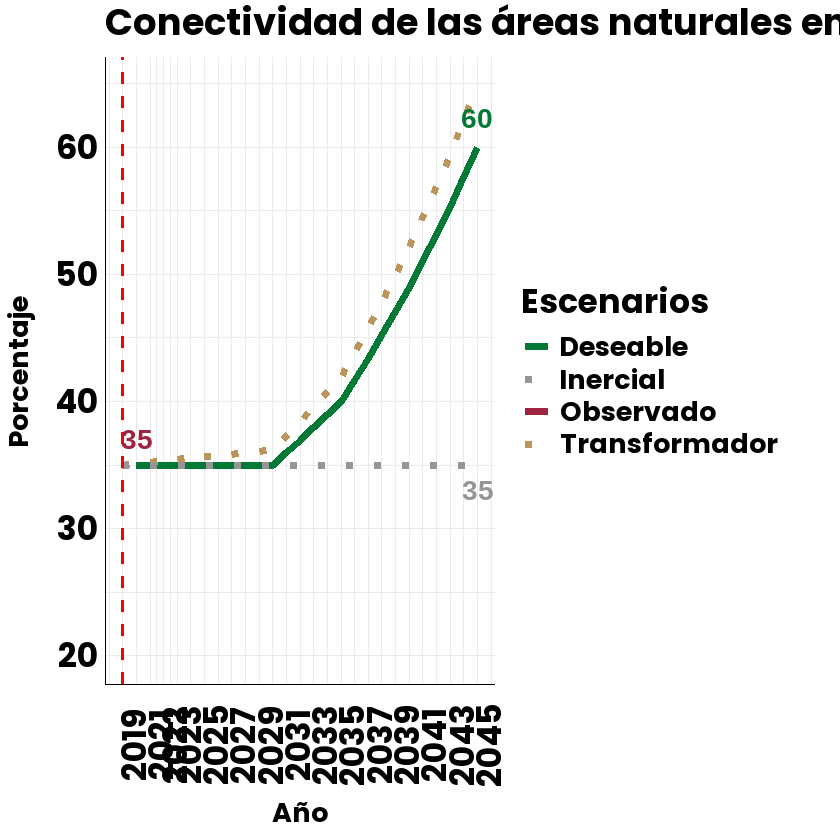

In [16]:
grafica_bonita(
  data = conectividad,
  x = "year",
  y = "estimado",
  titulo = "Conectividad de las áreas naturales en la Ciudad de México",
    ano_base = 2019,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2019,
  anios_etiquetas = c(2045),
    desplazamiento_ano_base=c(1, 2),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 20
)


ggsave("H:/Mi unidad/pgd/graficas/Linea 13. Regenerativa del Suelo de Conservación/conectividad_areas_nat.png", 
width = 10, height = 8, dpi = 200, bg = "white")


In [31]:
vegeta_nat<-openxlsx::read.xlsx("datos_suelo.xlsx", sheet="vegeta_nat")%>%
  
rename(
  year = periodo

)%>%
select(year,vegeta_nat)%>%
intervals("vegeta_nat", margen = 0.0004, año_base = 2019)

vegeta_nat

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2019,41.17000,41.17000,41.17000
2,2020,41.24477,41.26127,41.22828
3,2021,41.31968,41.35274,41.28664
4,2022,41.39472,41.44442,41.34509
5,2023,41.46990,41.53629,41.40362
6,2024,41.54522,41.62838,41.46223
7,2025,41.62067,41.72066,41.52092
8,2026,41.69626,41.81315,41.57970
9,2027,41.77199,41.90585,41.63856


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


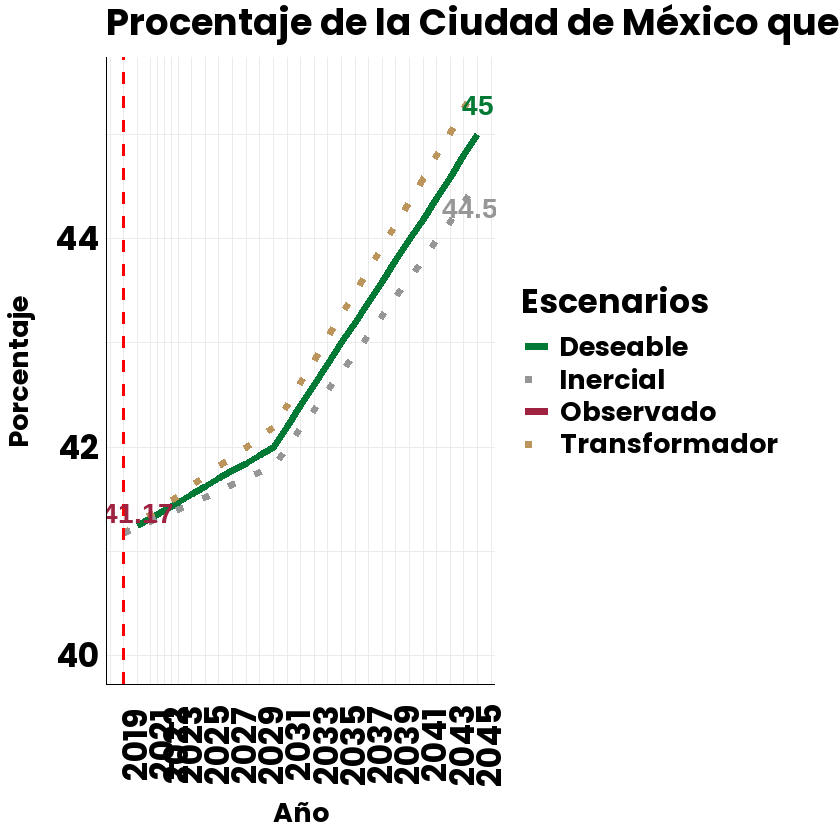

In [41]:
grafica_bonita(
  data = vegeta_nat,
  x = "year",
  y = "estimado",
  titulo = "Procentaje de la Ciudad de México que está cubierta por vegetación nativa",
    ano_base = 2019,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2019,
  anios_etiquetas = c(2045),
    desplazamiento_ano_base=c(1, 0.2),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 40
)


ggsave("H:/Mi unidad/pgd/graficas/Linea 13. Regenerativa del Suelo de Conservación/vegeta_nativa.png", 
width = 10, height = 8, dpi = 200, bg = "white")
